In [1]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
DATASET="images/train"
DATASET2="images/valid"

In [3]:
CATEGORIES=["Bombay","British Shorthair","Burmese","Calico","Dilute Calico","Himalayan","Munchkin","Ragdoll","Russian Blue","Siberian"]

In [4]:
train_data=[]

In [5]:
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        print(path)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            train_data.append([img,label])

images/train/Bombay
images/train/British Shorthair
images/train/Burmese
images/train/Calico
images/train/Dilute Calico
images/train/Himalayan
images/train/Munchkin
images/train/Ragdoll
images/train/Russian Blue
images/train/Siberian


In [6]:
test_data=[]

In [7]:
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        print(path)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])

images/valid/Bombay
images/valid/British Shorthair
images/valid/Burmese
images/valid/Calico
images/valid/Dilute Calico
images/valid/Himalayan
images/valid/Munchkin
images/valid/Ragdoll
images/valid/Russian Blue
images/valid/Siberian


In [8]:
print(len(train_data))
print(len(test_data))

15654
1779


In [9]:
import random

In [10]:
random.shuffle(train_data)
random.shuffle(test_data)

In [11]:
for lbl in train_data[:10]:
    print(lbl[1])

0
3
8
9
8
4
4
7
8
5


In [12]:
X_train=[]
y_train=[]

In [13]:
for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [14]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("Bombay")
    elif i==1:
        Y.append("British Shorthair")
    elif i==2:
        Y.append("Burmese")
    elif i==3:
        Y.append("Calico")
    elif i==4:
        Y.append("Dilute Calico")
    elif i==5:
        Y.append("Himalayan")
    elif i==6:
        Y.append("Munchkin")
    elif i==7:
        Y.append("Ragdoll")
    elif i==8:
        Y.append("Russian Blue")
    else:
        Y.append("Siberian")


In [15]:
len(X_train),len(y_train)

(15654, 15654)

In [16]:
X_test=[]
y_test=[]

In [17]:
for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

In [18]:
Z=[]
for i in y_test:
    if i==0:
        Z.append("Bombay")
    elif i==1:
        Z.append("British Shorthair")
    elif i==2:
        Z.append("Burmese")
    elif i==3:
        Z.append("Calico")
    elif i==4:
        Z.append("Dilute Calico")
    elif i==5:
        Z.append("Himalayan")
    elif i==6:
        Z.append("Munchkin")
    elif i==7:
        Z.append("Ragdoll")
    elif i==8:
        Z.append("Russian Blue")
    else:
        Z.append("Siberian")


In [19]:
len(X_test),len(y_test)

(1779, 1779)

In [20]:
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

(15654, 64, 64, 3)

In [21]:
X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

(1779, 64, 64, 3)

In [22]:
order=["Bombay","British Shorthair","Burmese","Calico","Dilute Calico","Himalayan","Munchkin","Ragdoll","Russian Blue","Siberian"]

Text(0, 0.5, 'Image Count')

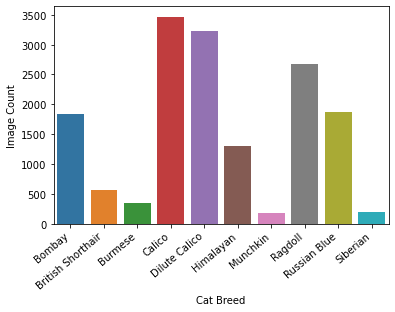

In [63]:
ax=sns.countplot(Y, order=order)
ax.set_xlabel("Cat Breed")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

Text(0, 0.5, 'Image Count')

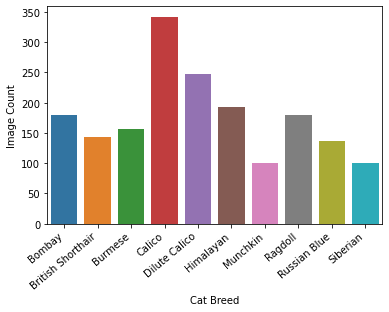

In [64]:
ax=sns.countplot(Z, order=order)
ax.set_xlabel("Cat Breed")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

In [25]:
from keras.utils import to_categorical

In [26]:
one_hot_train=to_categorical(y_train)
one_hot_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [27]:
one_hot_test=to_categorical(y_test)
one_hot_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout

In [29]:
classifier=Sequential()

In [30]:
classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=10))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [32]:
hist=classifier.fit(X_train,one_hot_train,epochs=100,batch_size=128,validation_split=0.2)

Epoch 1/100
98/98 [==============================] - 100s 1s/step - loss: 1.8648 - accuracy: 0.2924 - val_loss: 1.7436 - val_accuracy: 0.3769
Epoch 2/100
98/98 [==============================] - 105s 1s/step - loss: 1.6927 - accuracy: 0.3874 - val_loss: 1.7126 - val_accuracy: 0.3798
Epoch 3/100
98/98 [==============================] - 95s 971ms/step - loss: 1.6307 - accuracy: 0.4116 - val_loss: 1.6459 - val_accuracy: 0.4142
Epoch 4/100
98/98 [==============================] - 87s 884ms/step - loss: 1.5706 - accuracy: 0.4384 - val_loss: 1.5608 - val_accuracy: 0.4551
Epoch 5/100
98/98 [==============================] - 80s 818ms/step - loss: 1.5158 - accuracy: 0.4617 - val_loss: 1.5422 - val_accuracy: 0.4570
Epoch 6/100
98/98 [==============================] - 61s 625ms/step - loss: 1.4838 - accuracy: 0.4800 - val_loss: 1.5258 - val_accuracy: 0.4631
Epoch 7/100
98/98 [==============================] - 75s 761ms/step - loss: 1.4410 - accuracy: 0.4978 - val_loss: 1.4719 - val_accuracy: 0.4

98/98 [==============================] - 62s 634ms/step - loss: 0.3543 - accuracy: 0.8749 - val_loss: 2.1263 - val_accuracy: 0.5139
Epoch 58/100
98/98 [==============================] - 61s 620ms/step - loss: 0.3315 - accuracy: 0.8825 - val_loss: 2.1205 - val_accuracy: 0.5248
Epoch 59/100
98/98 [==============================] - 61s 618ms/step - loss: 0.3139 - accuracy: 0.8871 - val_loss: 2.1922 - val_accuracy: 0.5238
Epoch 60/100
98/98 [==============================] - 71s 722ms/step - loss: 0.3095 - accuracy: 0.8876 - val_loss: 2.2145 - val_accuracy: 0.5263
Epoch 61/100
98/98 [==============================] - 67s 681ms/step - loss: 0.3104 - accuracy: 0.8867 - val_loss: 2.1707 - val_accuracy: 0.5117
Epoch 62/100
98/98 [==============================] - 64s 657ms/step - loss: 0.3022 - accuracy: 0.8947 - val_loss: 2.3058 - val_accuracy: 0.5088
Epoch 63/100
98/98 [==============================] - 76s 773ms/step - loss: 0.3136 - accuracy: 0.8880 - val_loss: 2.1867 - val_accuracy: 0.520

In [33]:
test_loss,test_acc=classifier.evaluate(X_test,one_hot_test)
test_loss,test_acc

56/56 [==============================] - 2s 37ms/step - loss: 0.9408 - accuracy: 0.8730


(0.9407649040222168, 0.8729623556137085)

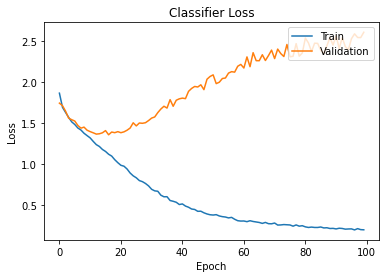

In [34]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

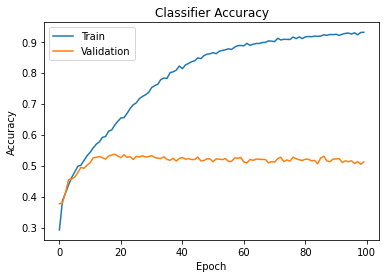

In [35]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [36]:
y_pred=classifier.predict_classes(X_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 2, 3, ..., 4, 1, 7])

In [37]:
y_prob=classifier.predict_proba(X_test)
y_prob

Instructions for updating:
Please use `model.predict()` instead.


array([[9.9999511e-01, 1.4218649e-08, 1.3887527e-08, ..., 7.8555198e-09,
        7.8563363e-07, 8.2987803e-08],
       [6.8051297e-05, 2.3768744e-05, 9.9970102e-01, ..., 1.4744014e-05,
        1.1732134e-04, 7.0111636e-09],
       [1.2565289e-07, 1.7941245e-05, 7.8178227e-06, ..., 1.4661376e-04,
        2.5508295e-06, 2.7901942e-07],
       ...,
       [1.6864030e-07, 2.1860984e-05, 5.6696776e-06, ..., 1.7038437e-02,
        3.7711545e-06, 1.8396552e-06],
       [1.8810887e-03, 9.8854673e-01, 3.3236134e-08, ..., 2.5629004e-05,
        8.9296587e-03, 6.6675998e-11],
       [9.0266825e-09, 2.3373778e-07, 1.9823206e-07, ..., 9.9616206e-01,
        2.9245629e-07, 1.0542086e-06]], dtype=float32)

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [39]:
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 10

In [40]:
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

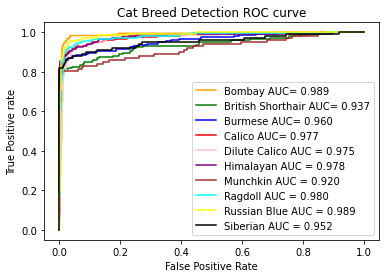

In [41]:
plt.plot(fpr[0], tpr[0], color='orange',label='Bombay AUC= %0.3f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green',label='British Shorthair AUC= %0.3f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue',label='Burmese AUC= %0.3f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='red',label='Calico AUC= %0.3f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], color='pink',label='Dilute Calico AUC = %0.3f' % roc_auc[4])
plt.plot(fpr[5], tpr[5], color='purple',label='Himalayan AUC = %0.3f' % roc_auc[5])
plt.plot(fpr[6], tpr[6], color='brown',label='Munchkin AUC = %0.3f' % roc_auc[6])
plt.plot(fpr[7], tpr[7], color='cyan',label='Ragdoll AUC = %0.3f' % roc_auc[7])
plt.plot(fpr[8], tpr[8], color='yellow',label='Russian Blue AUC = %0.3f' % roc_auc[8])
plt.plot(fpr[9], tpr[9], color='black',label='Siberian AUC = %0.3f' % roc_auc[9])
plt.title('Cat Breed Detection ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

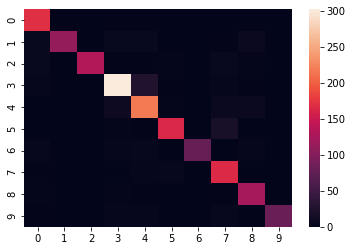

In [42]:
sns.heatmap(confusion_matrix(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)

In [43]:
cm

array([[170,   2,   1,   2,   2,   1,   0,   1,   1,   0],
       [  6, 113,   0,   6,   7,   1,   0,   2,   9,   0],
       [  6,   1, 133,   2,   2,   3,   0,   6,   3,   0],
       [  4,   0,   0, 302,  27,   2,   1,   4,   2,   0],
       [  0,   0,   0,  10, 218,   3,   0,   9,   8,   0],
       [  1,   0,   1,   3,   2, 164,   0,  20,   1,   0],
       [  5,   1,   1,   4,   5,   1,  80,   0,   4,   0],
       [  2,   0,   1,   1,   4,   5,   0, 166,   1,   0],
       [  3,   1,   0,   3,   2,   0,   0,   2, 125,   0],
       [  2,   0,   0,   4,   4,   1,   1,   5,   1,  82]])

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [50]:
acc=accuracy_score(y_test,y_pred)

In [62]:
acc*100

87.29623383923553

In [75]:
f1=f1_score(y_test,y_pred,average='macro')

In [76]:
f1*100

87.48323795744591